# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

In [6]:
#First, import all necessary libraries for data cleaning
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/Macjuliahu1/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


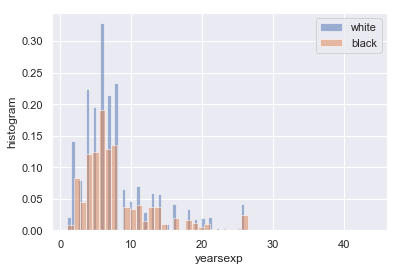

In [7]:
# Set default Seaborn style
sns.set()

# Compute number of data points: n_data
n_data=len(w.yearsexp)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot histogram of versicolor petal lengths
_=plt.hist(w.yearsexp,normed=True,bins=n_bins,alpha=0.5,label='white')

# Compute number of data points: n_data
n1_data=len(b.yearsexp)

# Number of bins is the square root of number of data points: n_bins
n1_bins = np.sqrt(n1_data)

# Convert number of bins to integer: n_bins
n1_bins = int(n1_bins)

# Plot histogram of versicolor petal lengths
_=plt.hist(b.yearsexp,normed=True,bins=n1_bins,alpha=0.5,label='black')

plt.xlabel('yearsexp')
plt.ylabel('histogram')
plt.legend(loc='best')
# Show histogram

plt.show()

The years of experience distribution for both black and white candidates look like a normal distribution, and follow the similar pattern. But we can apply bootstrap to test the assumption.

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

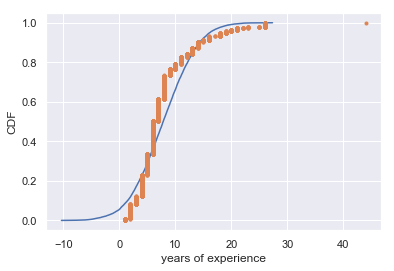

In [9]:
mu = np.mean(data.yearsexp)
sigma = np.std(data.yearsexp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)
x,y = ecdf(data.yearsexp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('years of experience')
_ = plt.ylabel('CDF')
plt.show()

The simulated normal distribution does not follow the raw data, so the original data does not follow CTL.

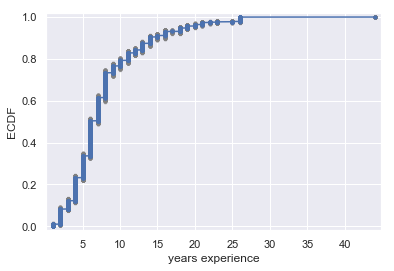

In [10]:
for bs_sample in range(100):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(data.yearsexp, size=len(data.yearsexp))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(data.yearsexp)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('years experience')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(data.call,np.mean,10000)

# Compute and print p-value: p
p = np.sum(bs_replicates - np.mean(data.call)>0) / len(bs_replicates)
print('p-value =', p)

p-value = 0.4843


The sampled data follow the trend with original data, and the sampled mean is similar to original data mean value, so CTL can be applied to test the data, with t test method. 

The null Hypothesis is the number of call for white and black candidates are the same. 
The alternative hypothesis is the number of call for white and black candidates are different. 

### Your solution to Q3 here

In [16]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



In [17]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [22]:
def diff_of_sum(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    # diff = np.mean(data_1)-np.mean(data_2)
    diff = np.sum(data_1)-np.sum(data_2)
    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_sum = diff_of_sum(w.call,b.call)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w.call, b.call,
                                 diff_of_sum, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_sum) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


Since the p value is small, this suggest that there is a significant difference in call back rate between races.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Question 4: 

Since the p value is small, this suggest that there is a significant difference in call back rate between races. The inferential statistics test shows there is a nonnegligible difference between white and black candidates. 

Question 5:

But this conclusion does not mean race is the deterministic cause for the call back difference. There are many different features exist in this dataset, and need to be explored more to understand if white and black candidates have exact same number of experiences and education level. More inferential statistics are need to answer such questions. 
        

In [25]:
def diff_of_mean(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    # diff = np.mean(data_1)-np.mean(data_2)
    diff = np.mean(data_1)-np.mean(data_2)
    return diff

In [27]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_mean = diff_of_mean(w.education,b.education)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w.education, b.education,
                                 diff_of_mean, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_mean) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.4097


Education and yearsexp for black and white candidates are similar. But other features need to be investigated.